# Show cruise path
The idea here is to plot cruise paths with scores and visualize the scoring in a rough sense. Obviously, it's better to have the scores overlain on bathymetry, but that's what we do with pycmeditor..

In [3]:
import numpy as np
import io
%matplotlib inline
import matplotlib.pyplot as plt
import pygmt

In [50]:
dirname="/swot2/features/cm_data/public/US_multi/"
cruise="M29L3_ed"
filename = dirname + cruise + ".cm.edit.US_multi.all"
data = np.loadtxt(filename, usecols=(1,2,-1))

In [51]:
region = [
    data[:,0].min() - 1,
    data[:,0].max() + 1,
    data[:,1].min() - 1,
    data[:,1].max() + 1,
]
print(region)

[-36.8408, -15.2318, -21.19438, 28.5766]


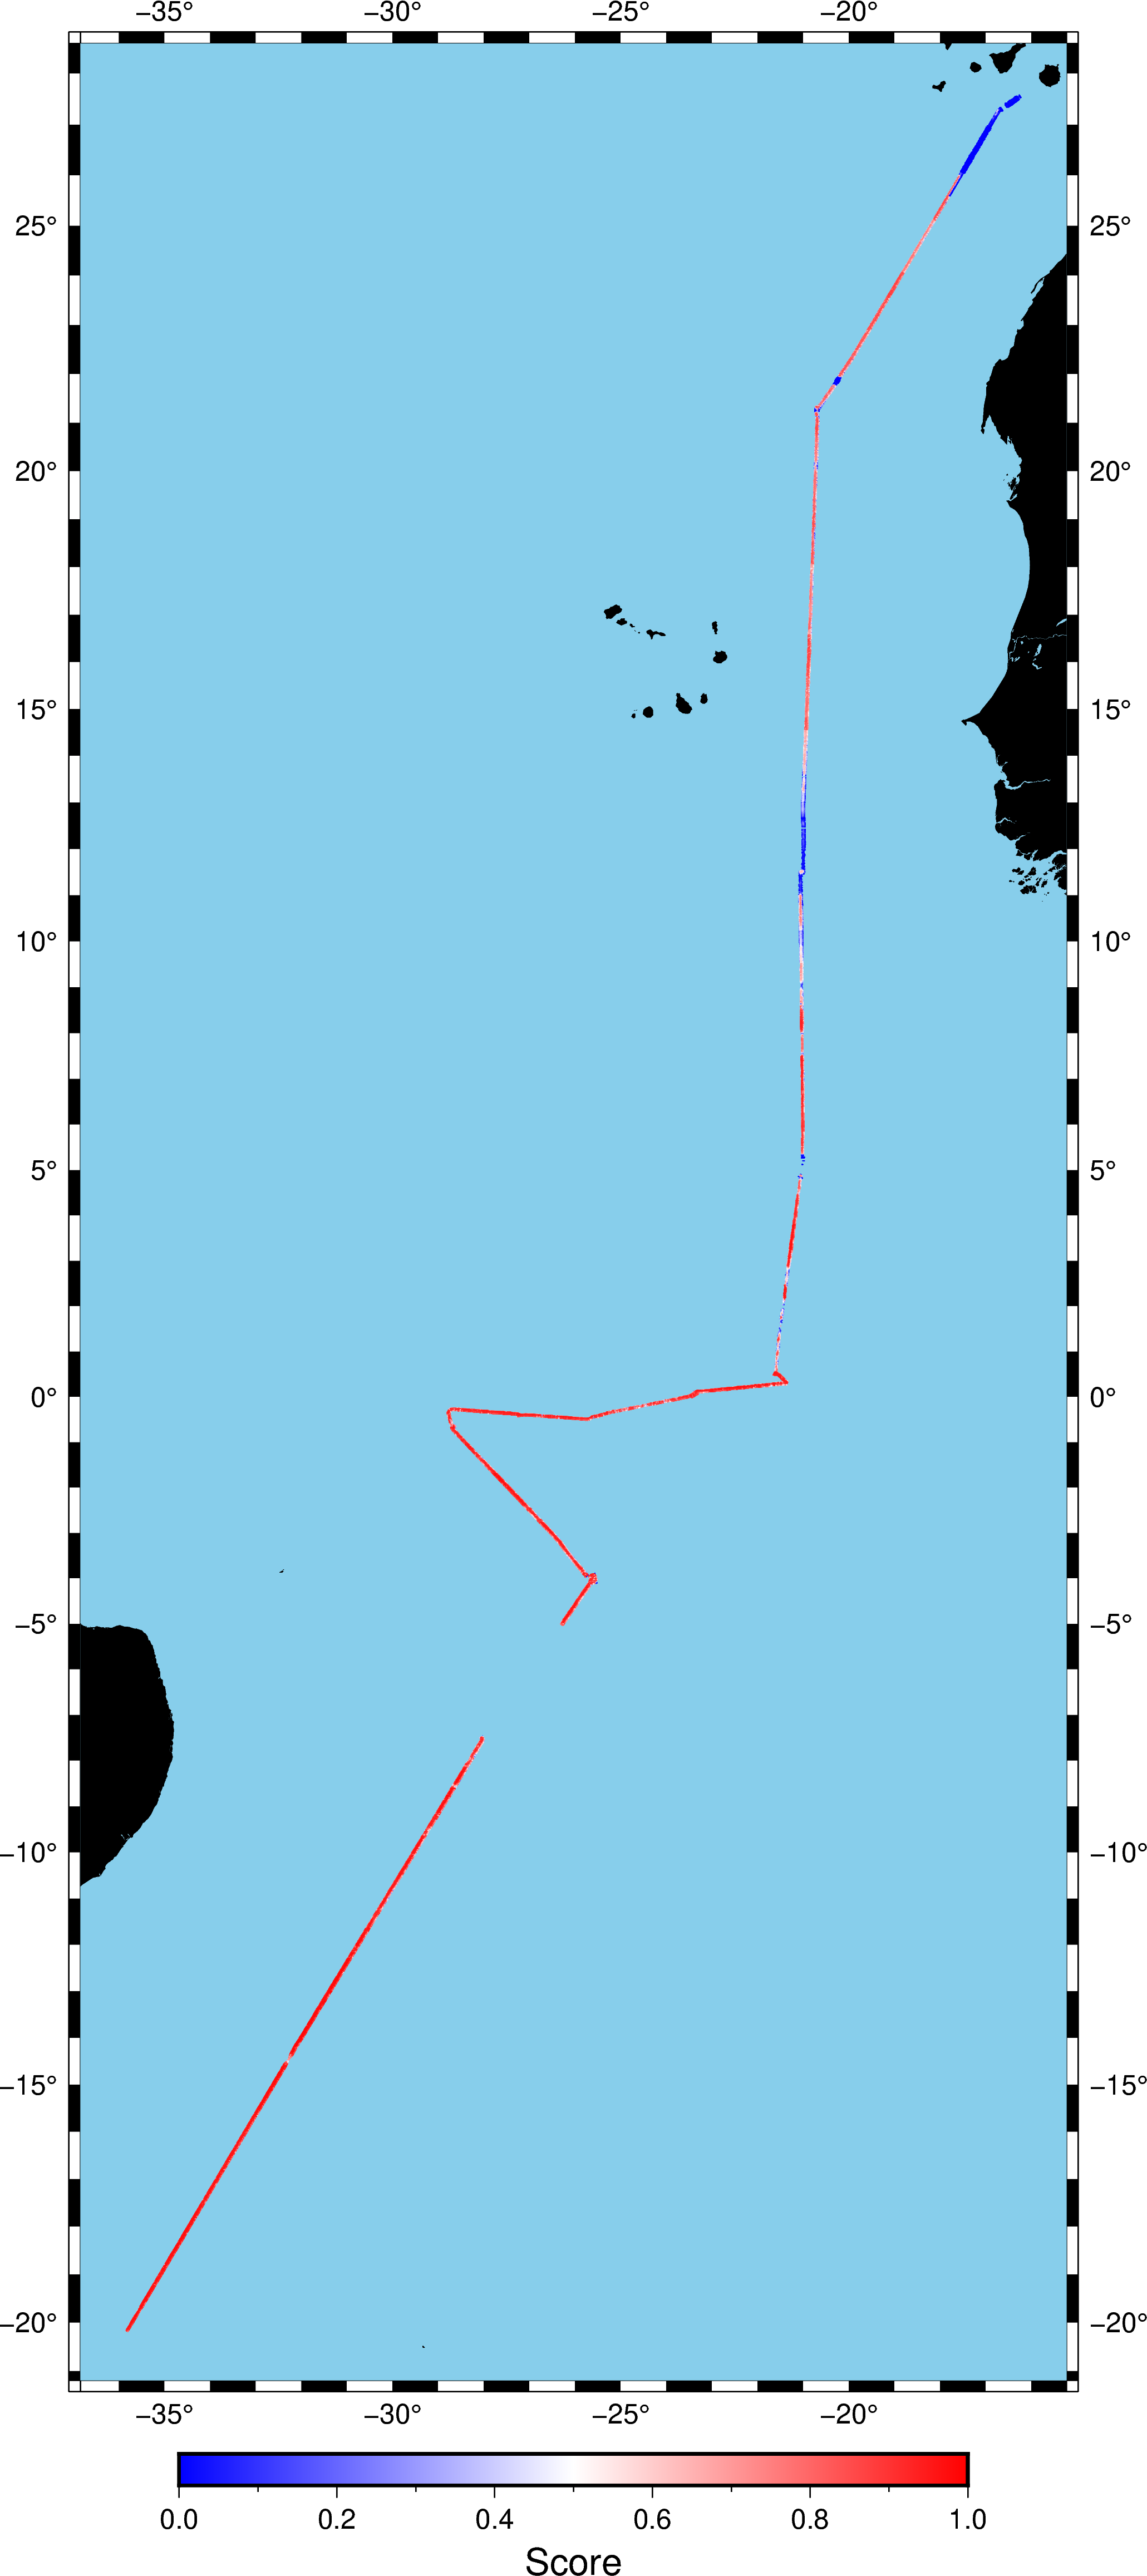

In [52]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c",frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="polar", series=[0,1])
fig.plot(
    x=data[:,0],
    y=data[:,1],
    color=data[:,2],
    cmap=True,
    style='p'
)
fig.colorbar(frame='af+l"Score"')
fig.show()

## Model w/ no lat,lon,yr

In [53]:
filename = dirname + cruise + ".cm.edit.US_multi.nolly"
data = np.loadtxt(filename, usecols=(1,2,-1))
region = [
    data[:,0].min() - 1,
    data[:,0].max() + 1,
    data[:,1].min() - 1,
    data[:,1].max() + 1,
]
print(region)

[-36.8408, -15.2318, -21.19438, 28.5766]


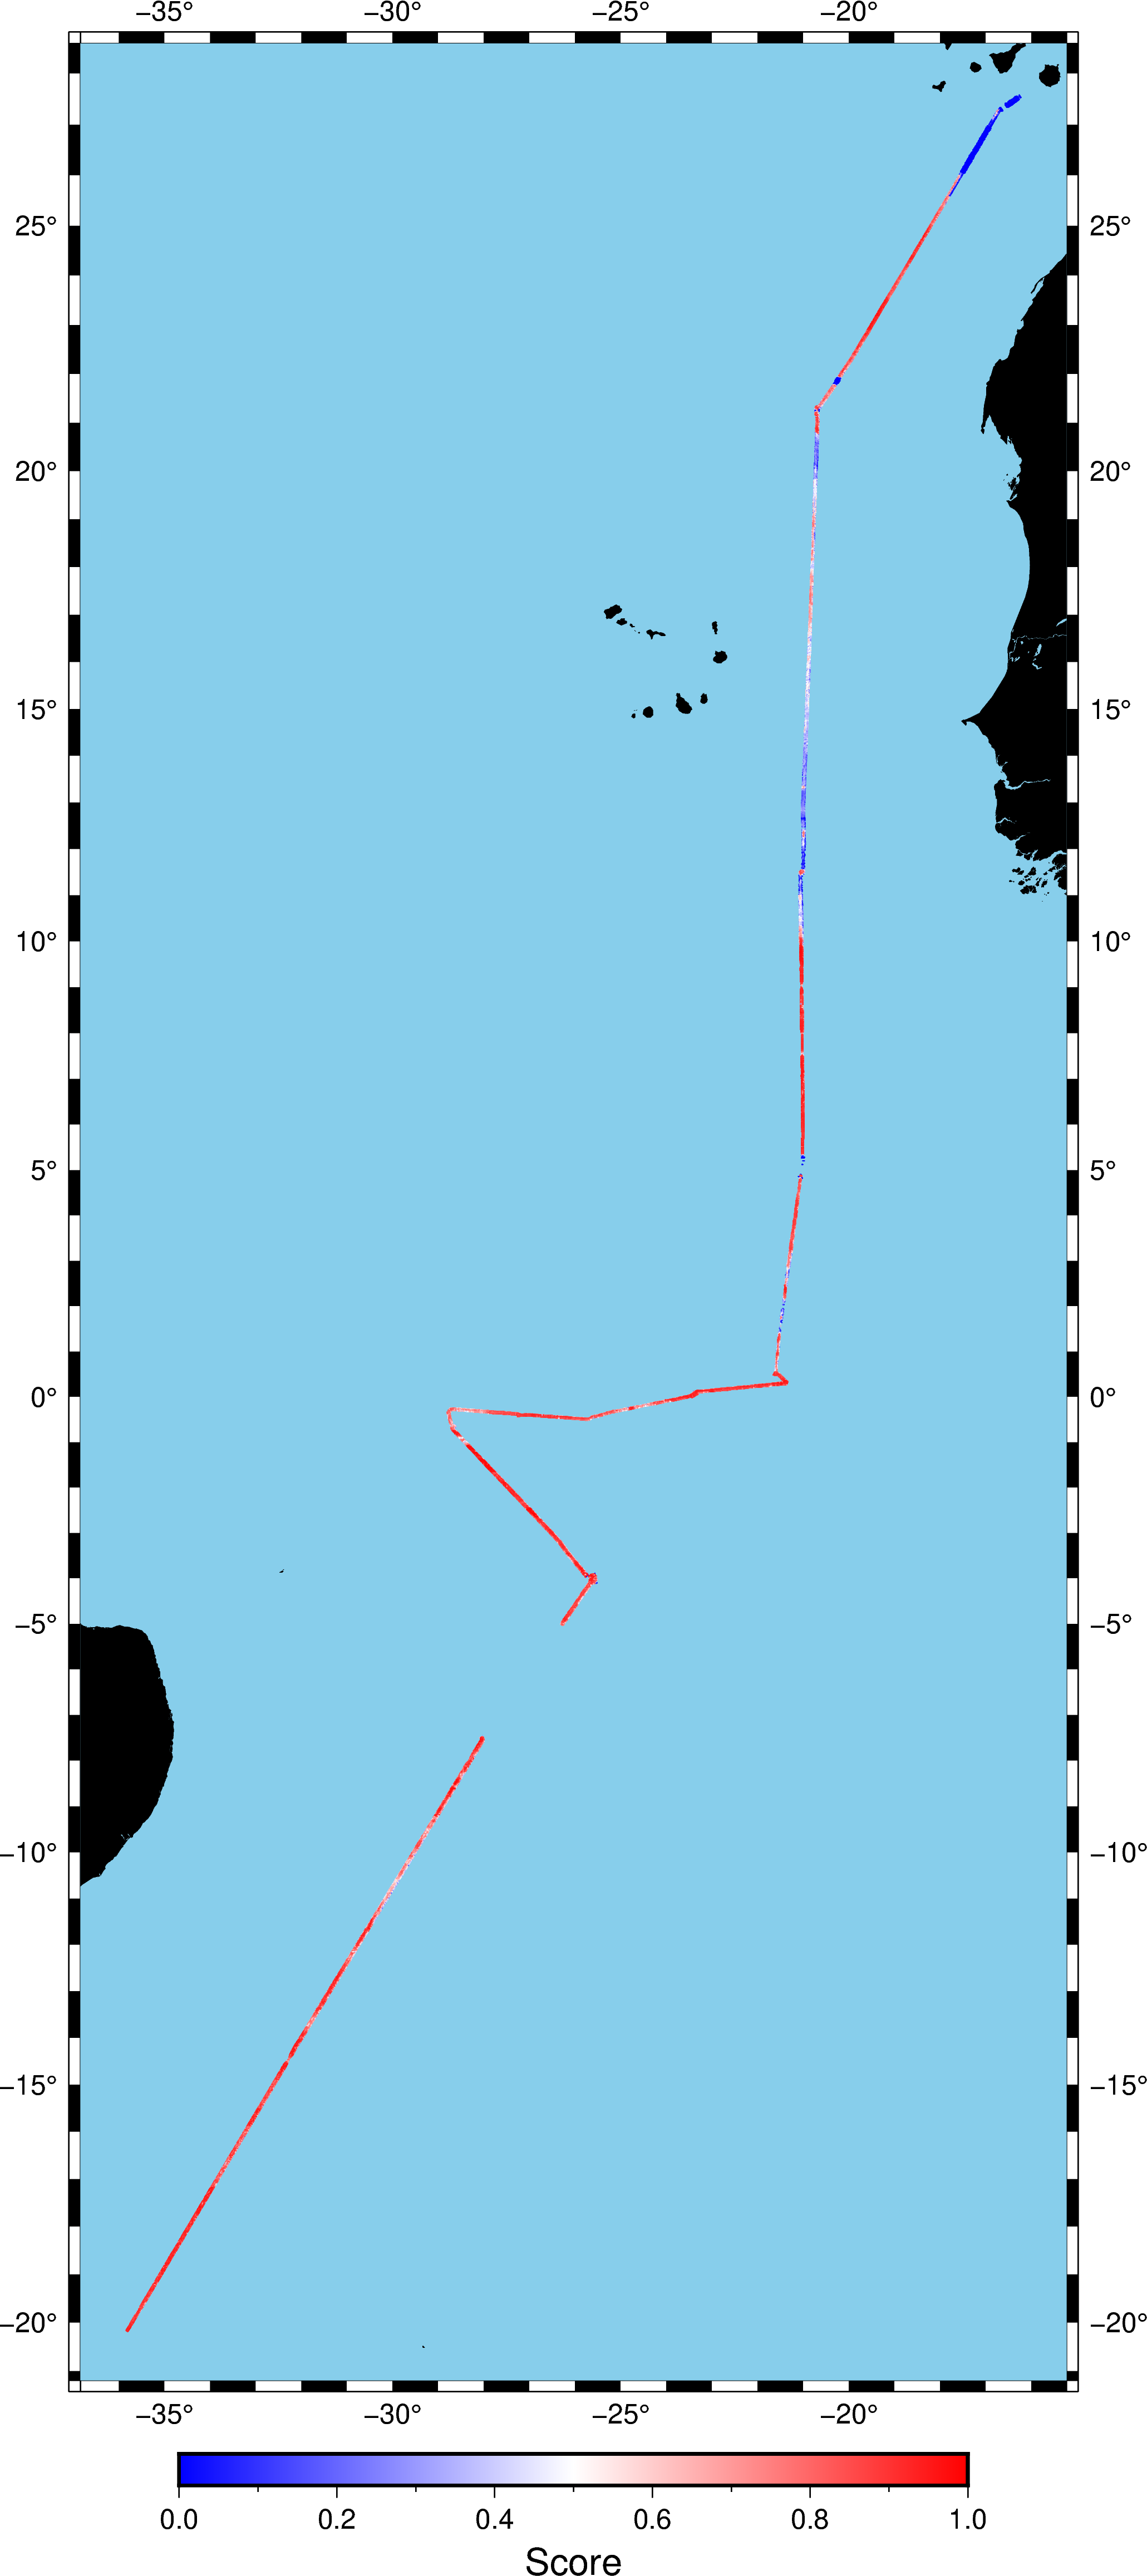

In [54]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c",frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="polar", series=[0,1])
fig.plot(
    x=data[:,0],
    y=data[:,1],
    color=data[:,2],
    cmap=True,
    style='p'
)
fig.colorbar(frame='af+l"Score"')
fig.show()

## Plot the "real scores"

In [57]:
filename = dirname + cruise + ".cm"
data = np.loadtxt(filename, usecols=(1,2,5))
region = [
    data[:,0].min() - 1,
    data[:,0].max() + 1,
    data[:,1].min() - 1,
    data[:,1].max() + 1,
]
print(region)

data[data[:,2]==-1,2] = 2
data[data[:,2]==9998,2] = 1
data[data[:,2]==9999,2] = 0

[-36.8408, -15.2318, -21.19438, 28.5766]


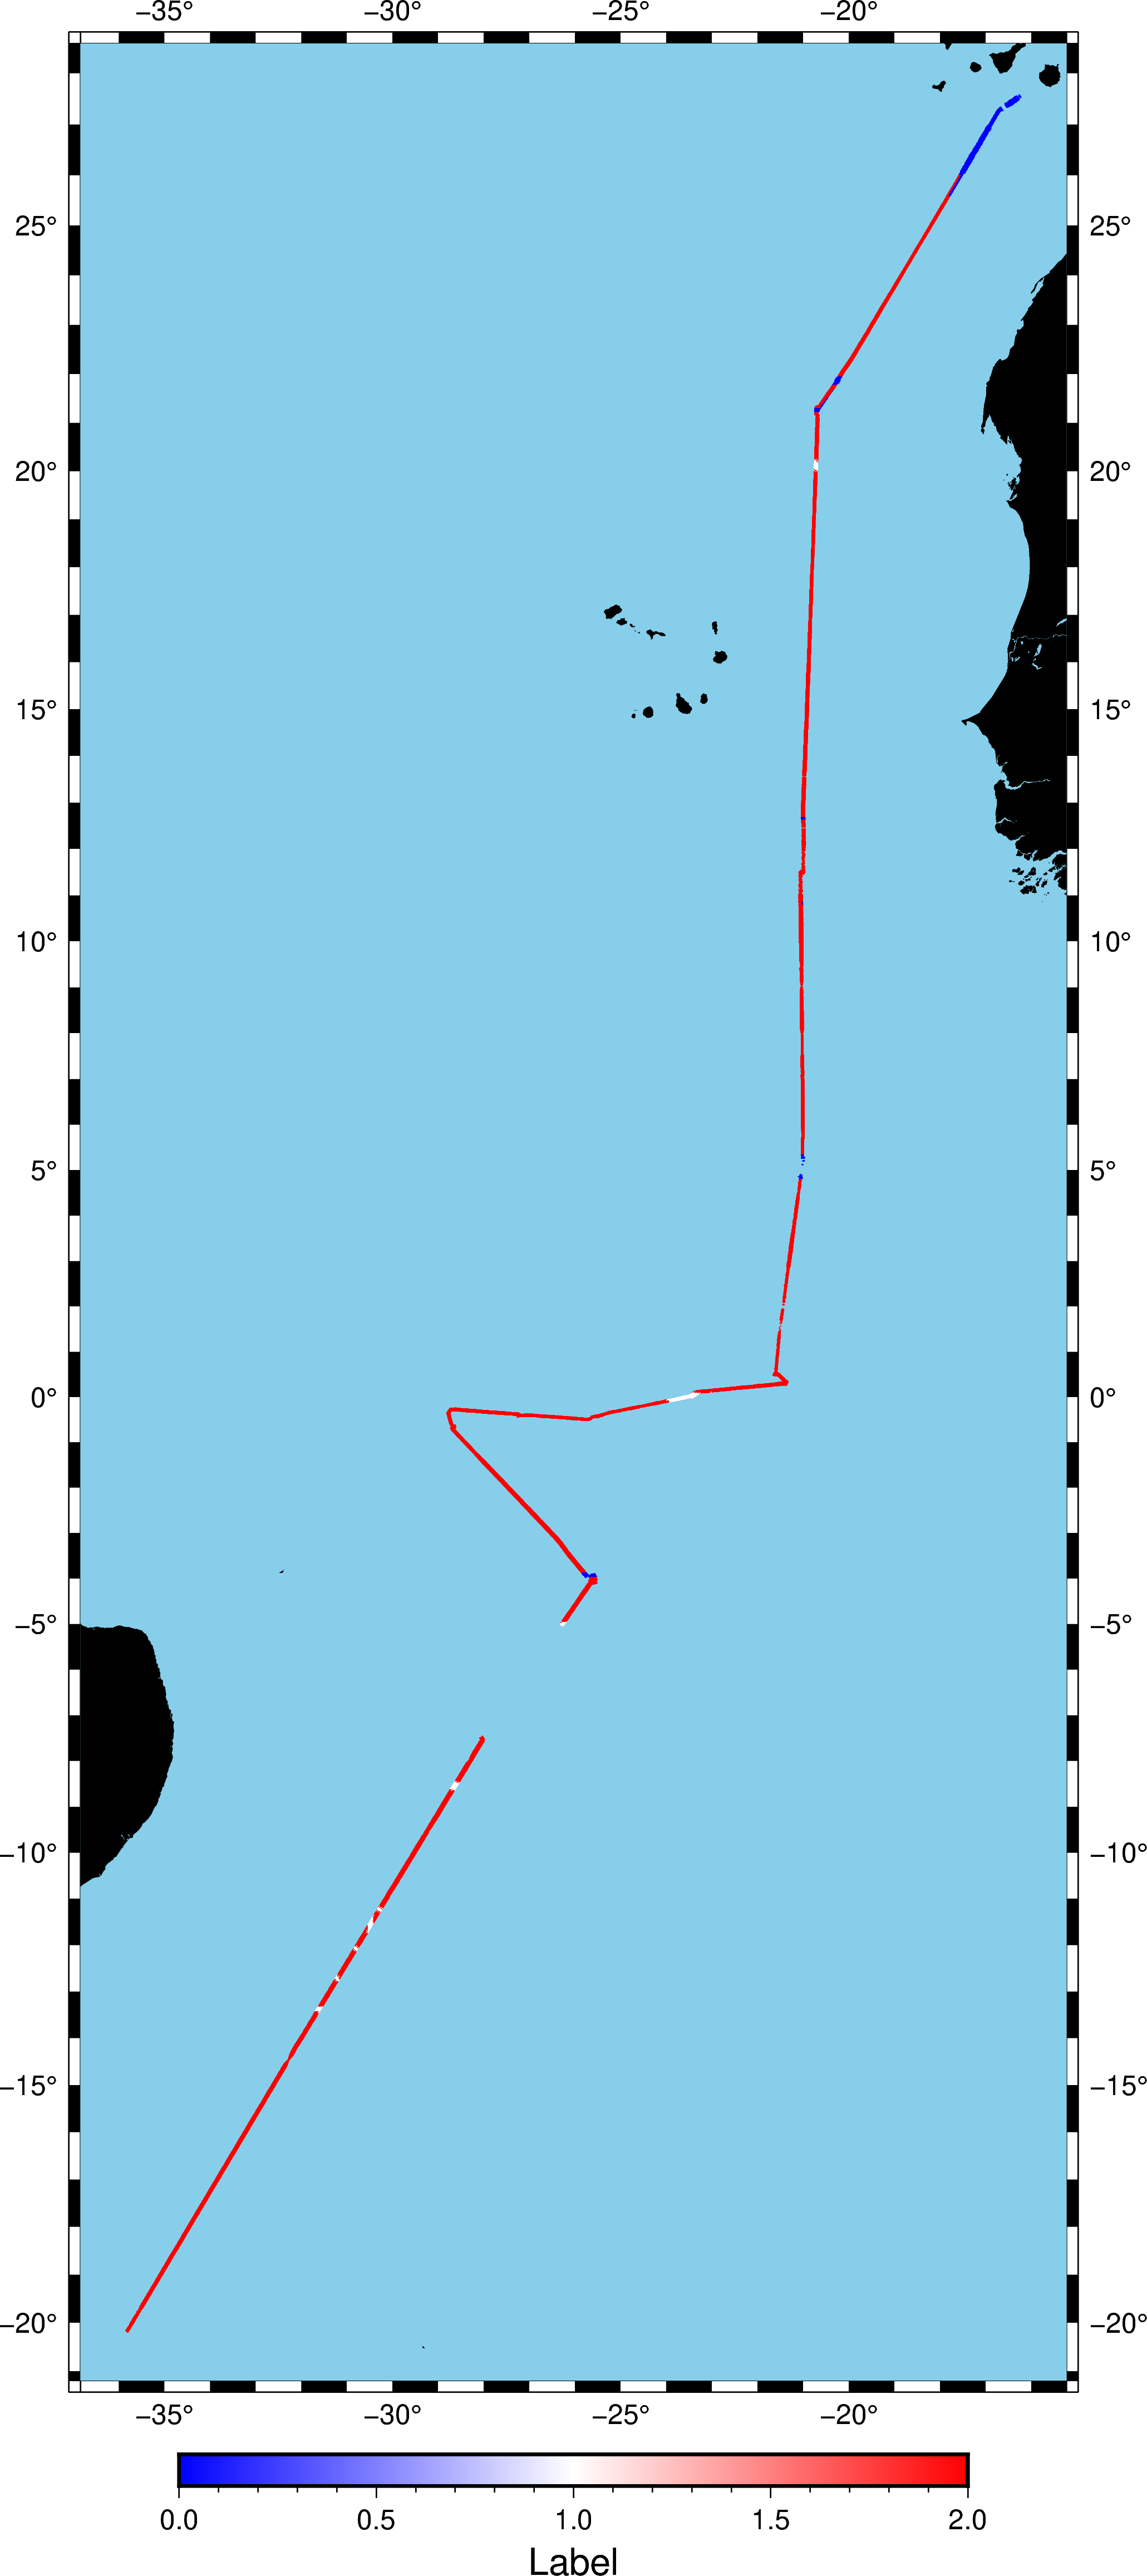

In [59]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c",frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="polar", series=[0,2], categorical=True)
fig.plot(
    x=data[:,0],
    y=data[:,1],
    color=data[:,2],
    cmap=True,
    style='p'
)
fig.colorbar(frame='af+l"Label"')
fig.show()